# **Implementing Decision Tree using Scikit Learn**

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#numpy and pandas initialization
import numpy as np
import pandas as pd

In [20]:
#Loading the PlayTennis data
PlayTennis = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DES423-Class3/PlayTennis.csv")

In [21]:
PlayTennis

,outlook,humidity,windy,play
0,sunny,high,False,no
1,sunny,high,True,no
2,overcast,high,False,yes
3,rainy,high,False,yes
4,rainy,normal,False,yes
5,rainy,normal,True,no
6,overcast,normal,True,yes
7,sunny,high,False,no
8,sunny,normal,False,yes
9,rainy,normal,False,yes


It is easy to implement Decision Tree with numerical values. We can convert all the non numerical values into numerical values using [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [22]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

PlayTennis['outlook'] = Le.fit_transform(PlayTennis['outlook'])
PlayTennis['humidity'] = Le.fit_transform(PlayTennis['humidity'])
PlayTennis['windy'] = Le.fit_transform(PlayTennis['windy'])
PlayTennis['play'] = Le.fit_transform(PlayTennis['play'])

In [23]:
PlayTennis

,outlook,humidity,windy,play
0,2,0,0,0
1,2,0,1,0
2,0,0,0,1
3,1,0,0,1
4,1,1,0,1
5,1,1,1,0
6,0,1,1,1
7,2,0,0,0
8,2,1,0,1
9,1,1,0,1


In [24]:
PlayTennis['outlook']

0     2
1     2
2     0
3     1
4     1
5     1
6     0
7     2
8     2
9     1
10    2
11    0
12    0
13    1
Name: outlook, dtype: int64

* Lets split the training data and its coresponding prediction values.
* y - holds all the decisions.
* X - holds the training data.

In [25]:
y = PlayTennis['play']
X = PlayTennis.drop(['play'],axis=1)

In [26]:
# Fitting the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'gini')
clf = clf.fit(X, y)

[Text(0.4, 0.9, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'X[1] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.3, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.5, 'X[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

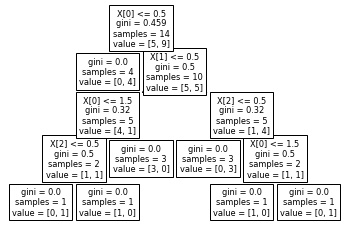

In [27]:
# We can visualize the tree using tree.plot_tree
tree.plot_tree(clf)

[GraphViz](https://www.graphviz.org/) gives a better and clearer Graph.

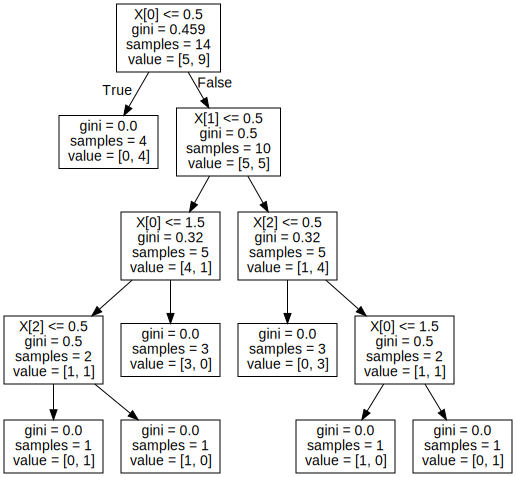

In [28]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In the above graph,

* X[0] -> Outlook
* X[1] -> Temperature
* X[2] -> Humidity
* X[3] -> Wind

values![image.png](attachment:image.png)



Since we dont have any data to test. we can just make the model to predict our train data.

In [ ]:
# The predictions are stored in X_pred
X_pred = clf.predict(X)

In [ ]:
# verifying if the model has predicted it all right.
X_pred == y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool